In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import dummy
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import statistics
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm

from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

import seaborn as sns
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None

data = pd.read_csv('Data-cleaned.csv', sep=",")
print(f'Le fichier data contient {data.shape[0]} lignes et {data.shape[1]} colonnes'.format())
data

Le fichier data contient 3282 lignes et 25 colonnes


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Age_batiment,Age_batiment_cat,NumberofBuildings,NumberofBuildings_cat,NumberofFloors,NumberofFloors_cat,PropertyGFATotal,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment,TotalUseTypeNumber,LargestPropertyUseType,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,88,Sup à 75 ans,1.0,1 batiment,12.0,Entre 8 et 12 etages,88434,1.000000,7369.500000,88434.0,1,Hotel,0.496412,0.527995,0.182253,0.289773,65.0,6.981428e+06,249.43
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,19,Entre 15 et 20 ans,1.0,1 batiment,11.0,Entre 8 et 12 etages,103566,0.854547,9415.090909,103566.0,3,Hotel,0.480394,0.467477,0.532542,0.000000,51.0,8.354235e+06,263.51
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,46,Entre 30 et 50 ans,1.0,1 batiment,41.0,Sup a 12 etages,961990,1.000000,23463.170732,961990.0,3,Hotel,0.558193,0.680459,0.050730,0.268839,18.0,7.313066e+07,2061.48
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,89,Sup à 75 ans,1.0,1 batiment,10.0,Entre 8 et 12 etages,61320,1.000000,6132.000000,61320.0,1,Hotel,0.591915,0.098090,0.070915,0.830998,1.0,2.822932e+07,1936.34
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,35,Entre 30 et 50 ans,1.0,1 batiment,18.0,Sup a 12 etages,119890,0.896071,6660.555556,119890.0,3,Hotel,0.663901,0.409077,0.590940,0.000000,67.0,1.482910e+07,507.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,50222,2016,Nonresidential COS,Office,2,GREATER DUWAMISH,26,Entre 25 et 30 ans,1.0,1 batiment,1.0,1 etage,12294,1.000000,12294.000000,12294.0,1,Office,2.856620,0.616974,0.383026,0.000000,46.0,8.497457e+05,20.94
3278,50223,2016,Nonresidential COS,Other,2,DOWNTOWN,12,Entre 10 et 15 ans,1.0,1 batiment,1.0,1 etage,16000,1.000000,16000.000000,16000.0,1,Other - Recreation,0.811312,0.417296,0.582704,0.000000,NaN,9.502762e+05,32.17
3279,50224,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,42,Entre 30 et 50 ans,1.0,1 batiment,1.0,1 etage,13157,1.000000,13157.000000,13157.0,3,Other - Recreation,2.407156,0.310820,0.689180,0.000000,NaN,5.765898e+06,223.54
3280,50225,2016,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,27,Entre 25 et 30 ans,1.0,1 batiment,1.0,1 etage,14101,1.000000,14101.000000,14101.0,5,Other - Recreation,5.389475,0.484898,0.515102,0.000000,NaN,7.194712e+05,22.11


In [2]:
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,Age_batiment,NumberofBuildings,NumberofFloors,PropertyGFATotal,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment,TotalUseTypeNumber,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3282.000000,3.282000e+03,3.282000e+03,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,2205.000000,3.282000e+03,3282.000000
mean,15962.538696,2015.501828,4.369287,54.025594,1.085009,4.209628,1.130035e+05,0.937960,3.337958e+04,1.063856e+05,1.876295,2.795602,0.701648,0.275776,0.021102,64.809070,7.860806e+06,174.775104
std,13372.517089,0.500073,2.195172,32.751286,1.139103,6.131888,1.933312e+05,0.138922,4.872347e+04,1.825179e+05,1.195054,2.210597,0.261431,0.262341,0.090838,28.552389,2.034838e+07,641.073575
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.128500e+04,0.104977,1.000000e-15,1.000000e-15,1.000000,0.017588,0.000000,0.000000,0.000000,1.000000,1.144100e+04,0.080000
25%,580.250000,2015.000000,2.000000,27.000000,1.000000,1.000000,2.940000e+04,1.000000,1.251477e+04,2.838000e+04,1.000000,0.860329,0.495163,0.000000,0.000000,47.000000,1.235970e+06,19.900000
50%,21125.000000,2016.000000,4.000000,50.000000,1.000000,3.000000,4.905900e+04,1.000000,2.219967e+04,4.722600e+04,2.000000,2.237218,0.706149,0.238338,0.000000,72.000000,2.542779e+06,49.270000
75%,24560.000000,2016.000000,7.000000,86.000000,1.000000,5.000000,1.048715e+05,1.000000,3.741500e+04,1.002345e+05,2.000000,4.241887,0.999982,0.485785,0.000000,89.000000,6.963231e+06,139.232500
max,50226.000000,2016.000000,7.000000,116.000000,39.000000,76.000000,2.200000e+06,1.000029,1.100000e+06,2.200000e+06,13.000000,8.843744,1.000087,1.000000,0.830998,100.000000,4.483853e+08,16870.980000


# Regresseur naïf

In [3]:
# Renommage de la cible
data['SiteEnergyUse']=data['SiteEnergyUse(kBtu)']

# Préparation des dataframes
df_2015 = data[data['DataYear'] == 2015]
df_2016 = data[data['DataYear'] == 2016]
df_2015.drop(['DataYear'],axis=1,inplace=True)
df_2016.drop(['DataYear'],axis=1,inplace=True)

# Conservation de la feature EnergyStarScore
energystar_score_2015 = df_2015[['ENERGYSTARScore']]
df_2015.drop(['ENERGYSTARScore'],axis=1,inplace=True)
df_2016.drop(['ENERGYSTARScore'],axis=1,inplace=True)


# Définition des targets et du jeu d'entrainement
data_train, data_test, target_conso_train, target_conso_test,target_emmi_train,target_emmi_test = model_selection.train_test_split(
    df_2015.drop(['SiteEnergyUse','TotalGHGEmissions'],axis=1), df_2015[['SiteEnergyUse']],df_2015[['TotalGHGEmissions']], test_size=0.2)

/tmp/ipykernel_16665/1926528011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.drop(['DataYear'],axis=1,inplace=True)
/tmp/ipykernel_16665/1926528011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.drop(['DataYear'],axis=1,inplace=True)
/tmp/ipykernel_16665/1926528011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.drop(['ENERGYSTARScore'],axis=1,inplace=True)
/tmp/ipykernel_16665/1926528011.py:13:

In [4]:
strategie = ["mean", "median"]
result_conso = []
result_emmissions = []

for s in strategie:
    dum = dummy.DummyRegressor(strategy=s)
    
    # Entraînement, prédictions et évaluations
    dum.fit(data_train, target_conso_train)
    y_pred_dummy_conso_train = dum.predict(data_train)
    y_pred_dummy_conso_test = dum.predict(data_test)
    result_conso.append([strategie,metrics.mean_absolute_error(target_conso_test, y_pred_dummy_conso_test)])
    
    dum.fit(data_train, target_emmi_train)
    y_pred_dummy_emmi_train = dum.predict(data_train)
    y_pred_dummy_emmi_test = dum.predict(data_test)
    result_emmissions.append([strategie,metrics.mean_absolute_error(target_emmi_test, y_pred_dummy_emmi_test)])
    
print("Pour la consommation :" ,result_conso)
print("Pour les émissions de CO2 :",result_emmissions)

Pour la consommation : [[['mean', 'median'], 7822426.351702999], [['mean', 'median'], 6064434.348623853]]
Pour les émissions de CO2 : [[['mean', 'median'], 185.22245653658035], [['mean', 'median'], 141.9148623853211]]


L'imputation par la médiane offre de meilleurs résultats

In [5]:
bilan_conso=[]
bilan_emmi=[]

bilan_conso.append(['Naif' , 'Train', 'MAE', format(metrics.mean_absolute_error(target_conso_train, y_pred_dummy_conso_train))])
bilan_conso.append(['Naif' , 'Train','RMSE', format(metrics.mean_squared_error(target_conso_train, y_pred_dummy_conso_train))])
bilan_conso.append(['Naif' , 'Train','R2', r2_score(target_conso_train,y_pred_dummy_conso_train)])
bilan_conso.append(['Naif' , 'Test', 'MAE', format(metrics.mean_absolute_error(target_conso_test, y_pred_dummy_conso_test))])
bilan_conso.append(['Naif' , 'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, y_pred_dummy_conso_test))])
bilan_conso.append(['Naif' , 'Test','R2', r2_score(target_conso_test,y_pred_dummy_conso_test)])

bilan_emmi.append(['Naif' , 'Train','MAE', format(metrics.mean_absolute_error(target_emmi_train, y_pred_dummy_emmi_train))])
bilan_emmi.append(['Naif' , 'Train','RMSE', format(metrics.mean_squared_error(target_emmi_train, y_pred_dummy_emmi_train))])
bilan_emmi.append(['Naif' ,'Train', 'R2', r2_score(target_emmi_train,y_pred_dummy_emmi_train)])
bilan_emmi.append(['Naif' , 'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, y_pred_dummy_emmi_test))])
bilan_emmi.append(['Naif' , 'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, y_pred_dummy_emmi_test))])
bilan_emmi.append(['Naif' ,'Test', 'R2', r2_score(target_emmi_test,y_pred_dummy_emmi_test)])

# Les modèles linéaires

In [6]:
data = pd.read_csv('Data-cleaned.csv', sep=",")

## 1) Préparation de la matrice

### 1-1) Correction des types

In [7]:
# Correction des types si nécessaire
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype(str)

# Suppression de la colonne des identifiants
data.drop(['OSEBuildingID'],axis=1,inplace=True)

# Renommage de la cible
data['SiteEnergyUse']=data['SiteEnergyUse(kBtu)']
data.drop(['SiteEnergyUse(kBtu)'],axis=1,inplace=True)

# Séparation des 2 DataFrame 2015 et 2016
df_2015 = data[data['DataYear'] == 2015]
df_2016 = data[data['DataYear'] == 2016]
df_2015.drop(['DataYear'],axis=1,inplace=True)
df_2016.drop(['DataYear'],axis=1,inplace=True)

/tmp/ipykernel_16665/2905368560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.drop(['DataYear'],axis=1,inplace=True)
/tmp/ipykernel_16665/2905368560.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016.drop(['DataYear'],axis=1,inplace=True)


In [8]:
# Préparation du df futur
data_futur = pd.read_csv('Data-cleaned-annees-futures.csv', sep=",")
data_futur.drop(data_futur[data_futur['NaturalGas_proportion'].isna()].index,inplace=True)
data_futur.drop(data_futur[data_futur['Steam_proportion'].isna()].index,inplace=True)
data_futur['CouncilDistrictCode'] = data_futur['CouncilDistrictCode'].astype(str)
data_futur.drop(['OSEBuildingID'],axis=1,inplace=True)
data_futur['SiteEnergyUse']=data_futur['SiteEnergyUse(kBtu)']
data_futur.drop(['SiteEnergyUse(kBtu)'],axis=1,inplace=True)

### 1-2) Vérification des outliers

Text(0.5, 1.0, '2016 - Influence de la surface totale sur la consommation')

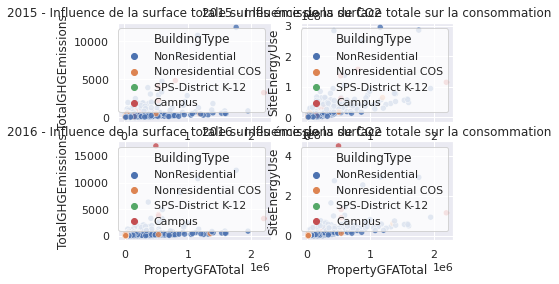

In [9]:
sns.set()
fig, axes = plt.subplots(2,2)
plt.rcParams["figure.figsize"] = (25,10)
sns.set(style="whitegrid",font_scale = 1)

sns.scatterplot(data=df_2015,x='PropertyGFATotal', y='TotalGHGEmissions',hue='BuildingType', alpha=.8,ax=axes[0,0])
sns.scatterplot(data=df_2015,x='PropertyGFATotal', y='SiteEnergyUse',hue='BuildingType', alpha=.8, ax=axes[0,1])

sns.scatterplot(data=df_2016,x='PropertyGFATotal', y='TotalGHGEmissions',hue='BuildingType', alpha=.8,ax=axes[1,0])
sns.scatterplot(data=df_2016,x='PropertyGFATotal', y='SiteEnergyUse',hue='BuildingType', alpha=.8, ax=axes[1,1])

axes[0,0].set_title('2015 - Influence de la surface totale sur les émissions de CO2')
axes[0,1].set_title('2015 - Influence de la surface totale sur la consommation')
axes[1,0].set_title('2016 - Influence de la surface totale sur les émissions de CO2')
axes[1,1].set_title('2016 - Influence de la surface totale sur la consommation')

### 1-3) Décalaration des catégories

In [10]:
# Définition des catégories pour l'encodage

numerical_features = df_2015.select_dtypes(include=['int64','float64']).columns.tolist()
categorial_features = df_2015.select_dtypes(exclude=['int64','float64']).columns.tolist()

### 1-4) Vérification des distributions numériques

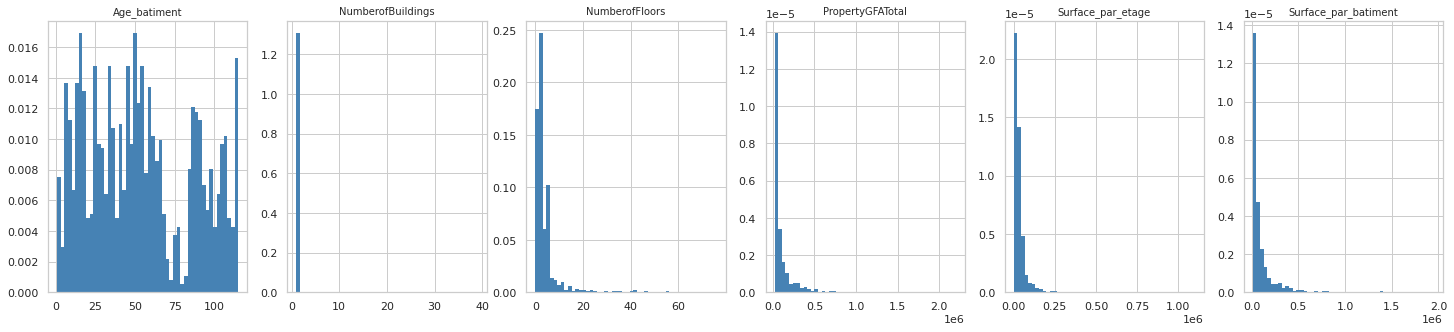

In [11]:
data_numerical_2015 = df_2015[numerical_features].reset_index(drop=True)
data_numerical_2016 = df_2016[numerical_features].reset_index(drop=True)

data_numerical_temp = data_numerical_2015[['Age_batiment','NumberofBuildings','NumberofFloors','PropertyGFATotal','Surface_par_etage','Surface_par_batiment']]
data_numerical_temp_values= data_numerical_temp.values
fig = plt.figure(figsize=(25, 5))
for feat_idx in range(data_numerical_temp.shape[1]):
    ax = fig.add_subplot(1,6, (feat_idx+1))
    h = ax.hist(data_numerical_temp_values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data_numerical_temp.columns[feat_idx], fontsize=10)

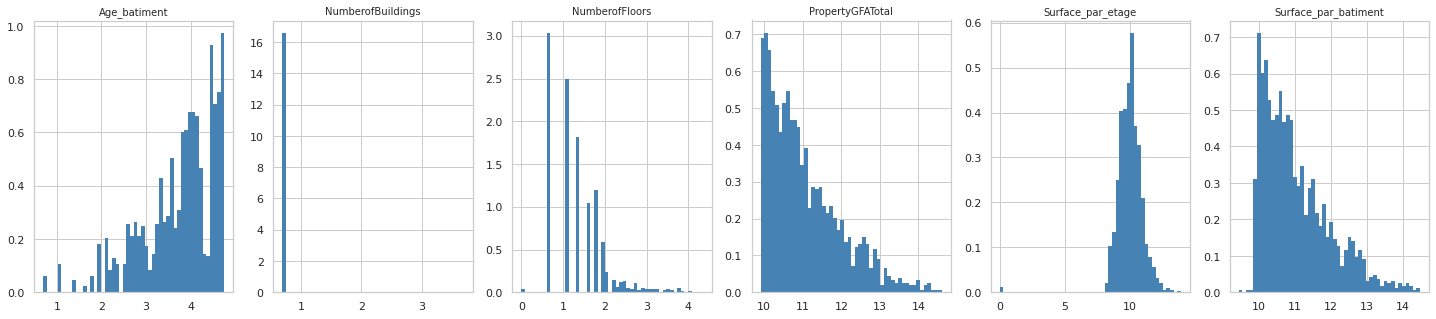

In [12]:
# Features numériques avec passage au log
data_numerical_temp = np.log1p(data_numerical_2015[['Age_batiment','NumberofBuildings','NumberofFloors','PropertyGFATotal','Surface_par_etage','Surface_par_batiment']])
data_numerical_temp_values= data_numerical_temp.values
fig = plt.figure(figsize=(25, 5))
for feat_idx in range(data_numerical_temp.shape[1]):
    ax = fig.add_subplot(1,6, (feat_idx+1))
    h = ax.hist(data_numerical_temp_values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data_numerical_temp.columns[feat_idx], fontsize=10)

On constate que les series : 'PropertyGFATotal', 'Surface_par_etage' et 'Surface_par_batiment' affichent de meilleures distributions sous log.  

### 1-4) Features numériques - corrélations

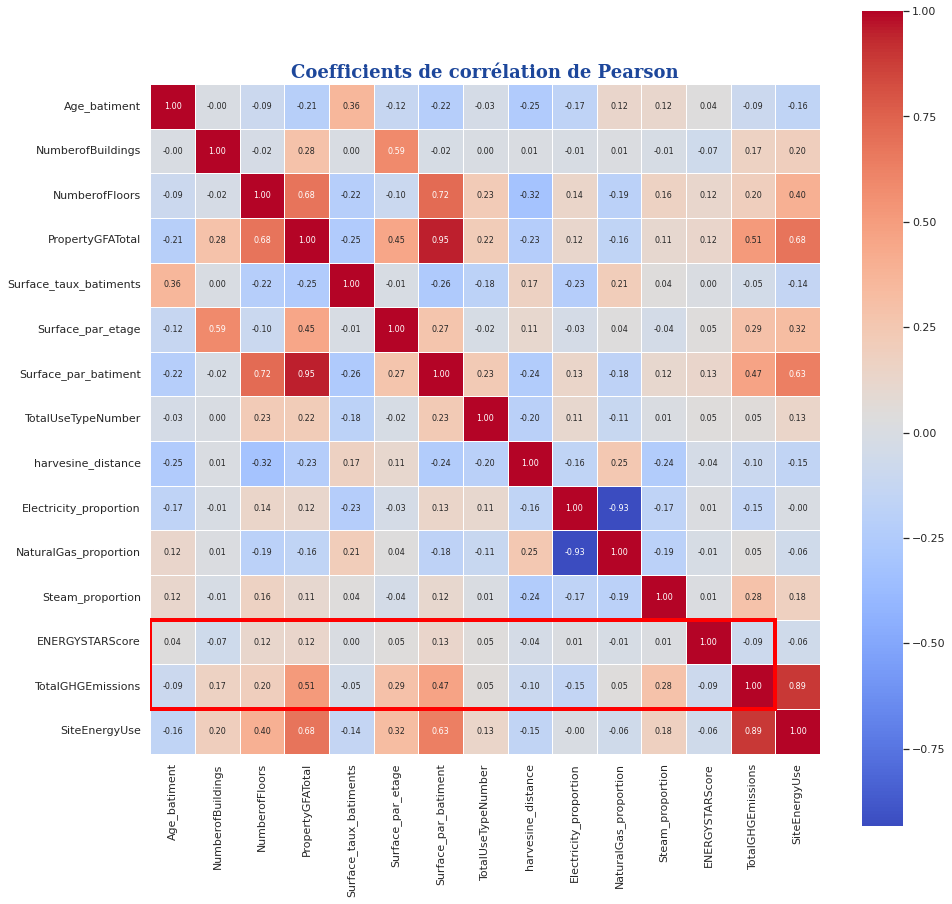

In [13]:
corr_mat = data_numerical_2015.corr(method='pearson', min_periods=1)

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

plt.figure(figsize=(15,15))
# mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, square=True, linewidths=0.5, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size':8}, )
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, 12), 14, 2, facecolor="none", ec='red', lw=4))
plt.show()

Nos cibles sont faiblement corrélées au données numériques. Les modèles linéires ne devraient pas donner les meilleures performances.  

On constate également que la feature 'Surface_par_batiment' est très corrélée à la surface totale.

### Calcul du VIF (Variance Inflation Factor)

In [14]:
# Vérification de la colinéarité

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values('VIF',ascending=False))

In [15]:
data_numerical_temp = data_numerical_2015.drop(['SiteEnergyUse','TotalGHGEmissions','ENERGYSTARScore'],axis=1)

In [16]:
data_numerical_temp.describe()

,Age_batiment,NumberofBuildings,NumberofFloors,PropertyGFATotal,Surface_taux_batiments,Surface_par_etage,Surface_par_batiment,TotalUseTypeNumber,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion
count,1635.000000,1635.000000,1635.000000,1.635000e+03,1635.000000,1.635000e+03,1.635000e+03,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,53.848930,1.066055,4.200000,1.129529e+05,0.937812,3.390765e+04,1.094345e+05,1.849541,2.784427,0.706540,0.272014,0.021048
std,32.745501,1.111547,6.111149,1.942630e+05,0.137052,4.978770e+04,1.847416e+05,1.165337,2.216437,0.259584,0.260421,0.090367
min,1.000000,1.000000,0.000000,2.000000e+04,0.201833,1.000000e-15,1.264467e+04,1.000000,0.017588,0.000003,0.000000,0.000000
25%,26.000000,1.000000,1.000000,2.950300e+04,1.000000,1.259162e+04,2.936000e+04,1.000000,0.856115,0.503359,0.000000,0.000000
50%,50.000000,1.000000,3.000000,4.923400e+04,1.000000,2.237120e+04,4.889000e+04,1.000000,2.184050,0.718225,0.227429,0.000000
75%,86.000000,1.000000,5.000000,1.045690e+05,1.000000,3.770390e+04,1.030000e+05,2.000000,4.245976,1.000033,0.478618,0.000000
max,115.000000,39.000000,76.000000,2.200000e+06,1.000029,1.100000e+06,1.952220e+06,11.000000,8.843744,1.000087,0.999997,0.830998


In [17]:
calc_vif(data_numerical_temp)

,variables,VIF
3,PropertyGFATotal,123.314139
6,Surface_par_batiment,110.234679
4,Surface_taux_batiments,61.934591
9,Electricity_proportion,37.096965
1,NumberofBuildings,16.870144
10,NaturalGas_proportion,11.703627
0,Age_batiment,5.192280
2,NumberofFloors,4.585798
5,Surface_par_etage,4.067197
7,TotalUseTypeNumber,3.913798


In [18]:
data_numerical_temp.drop(['Surface_par_batiment'],axis=1,inplace=True)
calc_vif(data_numerical_temp)

,variables,VIF
4,Surface_taux_batiments,61.611983
8,Electricity_proportion,34.557864
9,NaturalGas_proportion,11.116316
3,PropertyGFATotal,5.442507
0,Age_batiment,5.168231
2,NumberofFloors,4.583503
5,Surface_par_etage,3.989401
6,TotalUseTypeNumber,3.901748
7,harvesine_distance,3.692282
1,NumberofBuildings,2.973440


In [19]:
# Suppression de la feature trop colinéaires
data_numerical_2015.drop(['Surface_par_batiment'],axis=1,inplace=True)
data_numerical_2016.drop(['Surface_par_batiment'],axis=1,inplace=True)

### 1-5) Traitement des cibles

Text(0.5, 1.0, 'Distribution log1p(Consommation)')

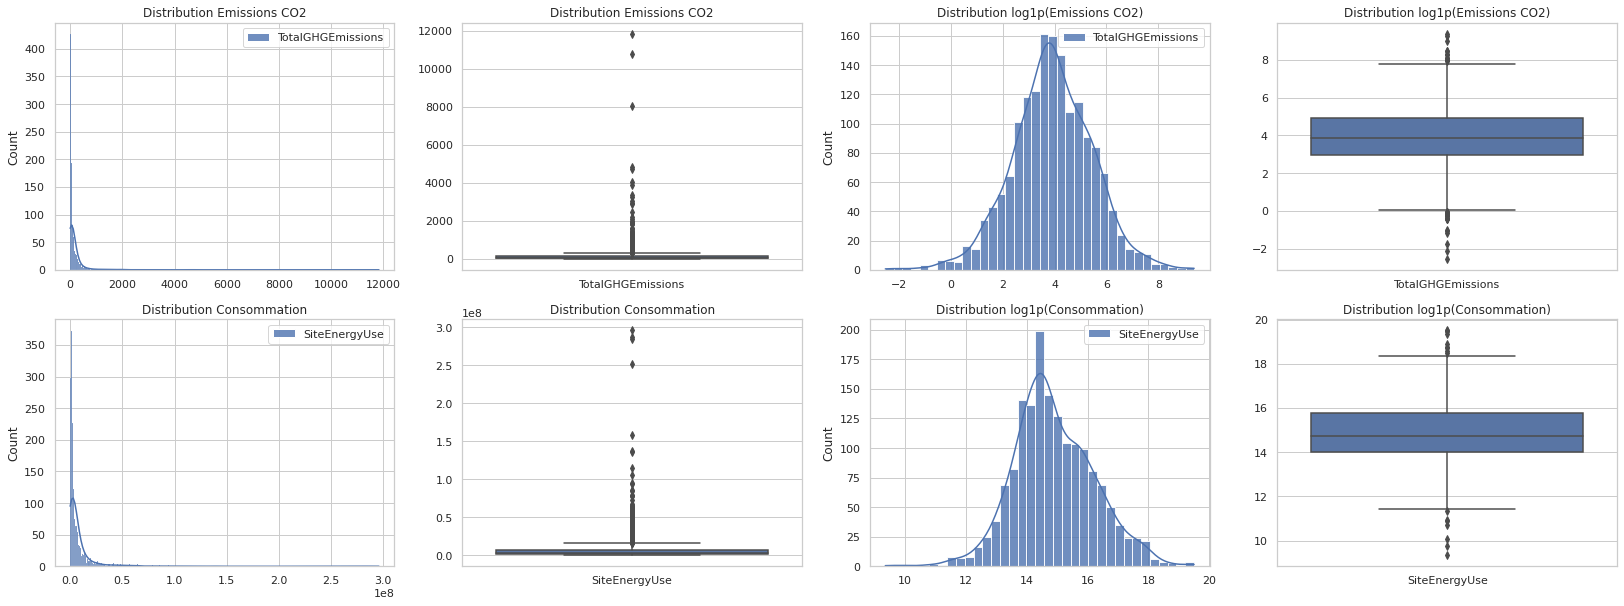

In [20]:
sns.set()
plt.rcParams["figure.figsize"] = (28,10)

sns.set(style="whitegrid",font_scale = 1)  # grille du fond + taille de toutes les polices
fig, axes = plt.subplots(2,4)

sns.histplot(data=data_numerical_2015[['TotalGHGEmissions']],alpha=0.8,kde=True,ax=axes[0,0])
sns.boxplot(data=(data_numerical_2015[['TotalGHGEmissions']]),ax=axes[0,1])
sns.histplot(data=np.log(data_numerical_2015[['TotalGHGEmissions']]),alpha=0.8,kde=True,ax=axes[0,2])
sns.boxplot(data=np.log(data_numerical_2015[['TotalGHGEmissions']]),ax=axes[0,3])

sns.histplot(data=data_numerical_2015[['SiteEnergyUse']],alpha=0.8,kde=True,ax=axes[1,0])
sns.boxplot(data=(data_numerical_2015[['SiteEnergyUse']]),ax=axes[1,1])
sns.histplot(data=np.log1p(data_numerical_2015[['SiteEnergyUse']]),alpha=0.8,kde=True,ax=axes[1,2])
sns.boxplot(data=(np.log1p(data_numerical_2015[['SiteEnergyUse']])),ax=axes[1,3])

axes[0,0].set_title('Distribution Emissions CO2')
axes[0,1].set_title('Distribution Emissions CO2')
axes[0,2].set_title('Distribution log1p(Emissions CO2)')
axes[0,3].set_title('Distribution log1p(Emissions CO2)')
axes[1,0].set_title('Distribution Consommation')
axes[1,1].set_title('Distribution Consommation')
axes[1,2].set_title('Distribution log1p(Consommation)')
axes[1,3].set_title('Distribution log1p(Consommation)')

On observe que les distributions sont plus 'normales' une fois passées au log.  

Les cibles seront passées au log. Les coefficients et les métriques devont être interprétés afin de tester les effets.

### 1-6) Encodage des features catégorielles

In [21]:
# Déclaration des catégories
BuidingType_2016 = df_2016[['BuildingType']]

categorial_features = ['BuildingType','PrimaryPropertyType','CouncilDistrictCode','Neighborhood',
                       'LargestPropertyUseType','Age_batiment_cat','NumberofBuildings_cat','NumberofFloors_cat']

data_categ_2015 = df_2015[categorial_features]
data_categ_2016 = df_2016[categorial_features]

Les catégories suivantes sont ordinales :   
    - age_batiment_cat  
    - numberofbuidings_cat  
    - Numberoffloor_cat  

Elles ne seront ni encodées avec un Ordinal encoder ni avec un LabelEncoder. En effet, faire ces encodages induirait que les valeurs prises sont réparties de facon linéaire.  

Toutes les variables catégorielles seront encodées via OneHotEncoder (en veuillant à supprimer une modalité car si toutes les modalités sont présentes, elles seront forcément co-linéaires entres elles).  

In [22]:
# Encodage des variables nominales 

def encodage_OHE(df):
    encoder = OneHotEncoder(drop='first',sparse=False)
    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    # L'option drop sur le OneHotEncoder permet de supprimer une modalité. En effet, dans le cadre d'un modèle linéaire, si toutes les modalités sont présentes --> colinéarité
    # Option sparse afin de pouvoir recréer un DataFrame après, sinon la matrice est parsée 
    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    data_cat_encoded = encoder.fit_transform(df.values)
    columns_encoded = encoder.get_feature_names(df.columns)  # Récupération du nom des colonnes après encodage

    data_cat_encoded = pd.DataFrame(data_cat_encoded,columns=columns_encoded) # Création d'un DataFrame encodé
    data_cat_encoded.reset_index(drop=True,inplace=True)
    return data_cat_encoded

In [23]:
# Encodage des données 2015 - 2016 et futures :
encoder = OneHotEncoder(drop='first',sparse=False) # Drop permet de supprimer une modalité pour éviter les effets de colinéairité
encoder_fited = encoder.fit(data_categ_2015.values) # Entrainement de l'encodeur


# 2015
data_cat_encoded = encoder_fited.transform(data_categ_2015.values)
columns_encoded = encoder_fited.get_feature_names(data_categ_2015.columns)  # Récupération du nom des colonnes après encodage
data_cat_encoded = pd.DataFrame(data_cat_encoded,columns=columns_encoded) # Création d'un DataFrame encodé
data_cat_encoded.reset_index(drop=True,inplace=True)
data_encoded_2015 = pd.concat([data_numerical_2015,data_cat_encoded],axis=1)
data_encoded_2015.reset_index(inplace=True,drop=True)

# 2016 
data_cat_encoded = encoder_fited.transform(data_categ_2016.values)
columns_encoded = encoder_fited.get_feature_names(data_categ_2016.columns)  # Récupération du nom des colonnes après encodage
data_cat_encoded = pd.DataFrame(data_cat_encoded,columns=columns_encoded) # Création d'un DataFrame encodé
data_cat_encoded.reset_index(drop=True,inplace=True)
data_encoded_2016 = pd.concat([data_numerical_2016,data_cat_encoded],axis=1)
data_encoded_2016.reset_index(inplace=True,drop=True)

# Futur
data_futur.reset_index(drop=True,inplace=True)
data_numerical_futur = data_futur[numerical_features]
data_categorial_futur = data_futur[categorial_features]

data_cat_encoded = encoder_fited.transform(data_categorial_futur.values)
columns_encoded = encoder_fited.get_feature_names(data_categorial_futur.columns)  # Récupération du nom des colonnes après encodage
data_cat_encoded = pd.DataFrame(data_cat_encoded,columns=columns_encoded) # Création d'un DataFrame encodé
data_cat_encoded.reset_index(drop=True,inplace=True)
data_encoded_futur = pd.concat([data_numerical_futur,data_cat_encoded],axis=1)
data_encoded_futur.reset_index(inplace=True,drop=True)

## 2) Définition des jeux de données

In [24]:
# Définition des targets et du jeu d'entrainement
data_train, data_test, target_conso_train, target_conso_test,target_emmi_train,target_emmi_test = model_selection.train_test_split(
    data_encoded_2015.drop(['SiteEnergyUse','TotalGHGEmissions'],axis=1), data_encoded_2015[['SiteEnergyUse']],data_encoded_2015[['TotalGHGEmissions']], test_size=0.2)

# Conservation de la feature EnergyStarScore
energystar_score_2015_train = data_train[['ENERGYSTARScore']]
energystar_score_2015_test = data_test[['ENERGYSTARScore']]
data_train.drop(['ENERGYSTARScore'],axis=1,inplace=True)
data_test.drop(['ENERGYSTARScore'],axis=1,inplace=True)

# Définition des targets - log transoformation des cibles
target_conso_log_train = np.log1p(target_conso_train)
target_emmi_log_train = np.log1p(target_emmi_train)
target_conso_log_test = np.log1p(target_conso_test)
target_emmi_log_test = np.log1p(target_emmi_test)

data_test_2016 = data_encoded_2016.drop(['SiteEnergyUse','TotalGHGEmissions'],axis=1)
target_conso_2016 = data_encoded_2016[['SiteEnergyUse']]
target_emmi_2016 = data_encoded_2016[['TotalGHGEmissions']]


print(data_train.shape)
print(data_test.shape)
print(target_conso_train.shape)
print(target_conso_test.shape)

(1308, 95)
(327, 95)
(1308, 1)
(327, 1)


## 3) Sélection des features  

Sur la base d'une régression linéaire backward et de la p-value.  

In [25]:
import warnings
warnings.filterwarnings("ignore")

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [26]:
features_a_conserver_emmi = stepwise_selection(data_train, target_emmi_train,verbose=True)

Add  PrimaryPropertyType_Hospital   with p-value 2.5016e-148
Add  PropertyGFATotal               with p-value 6.56402e-96
Add  Steam_proportion               with p-value 4.82424e-19
Add  NumberofFloors                 with p-value 1.81812e-21
Add  NaturalGas_proportion          with p-value 6.07485e-13
Add  PrimaryPropertyType_Large Office with p-value 5.2328e-08
Add  NumberofBuildings_cat_Entre 2 et 3 batiments with p-value 5.66603e-07
Add  NumberofBuildings_cat_Entre 5 et 6 batiments with p-value 1.46978e-05
Add  Surface_par_etage              with p-value 6.47103e-05
Add  LargestPropertyUseType_Other/Specialty Hospital with p-value 0.000183285
Add  NumberofFloors_cat_Sup a 12 etages with p-value 0.000194803
Add  NumberofFloors_cat_Entre 8 et 12 etages with p-value 0.00016594


In [27]:
features_a_conserver_emmi_log = stepwise_selection(data_train, target_emmi_log_train,verbose=True)

Add  PropertyGFATotal               with p-value 1.44579e-89
Add  Electricity_proportion         with p-value 1.69674e-120
Add  PrimaryPropertyType_Warehouse  with p-value 6.32561e-22
Add  PrimaryPropertyType_Worship Facility with p-value 1.73265e-20
Add  PrimaryPropertyType_Self-Storage Facility with p-value 1.74809e-14
Add  LargestPropertyUseType_Self-Storage Facility with p-value 1.74809e-14
Add  PrimaryPropertyType_Supermarket/Grocery Store with p-value 3.8874e-13
Add  PrimaryPropertyType_Large Office with p-value 5.02323e-11
Add  Steam_proportion               with p-value 3.65454e-10
Add  Age_batiment                   with p-value 5.79629e-13
Add  NumberofFloors_cat_Entre 5 et 8 etages with p-value 7.01672e-09
Add  LargestPropertyUseType_Distribution Center with p-value 4.71561e-07
Add  PrimaryPropertyType_K-12 School with p-value 1.34077e-06
Add  Surface_par_etage              with p-value 9.50546e-07
Add  NumberofBuildings              with p-value 1.0959e-10
Add  NumberofFloo

In [28]:
features_a_conserver_conso = stepwise_selection(data_train, target_conso_train,verbose=True)

Add  PropertyGFATotal               with p-value 1.04535e-180
Add  PrimaryPropertyType_Hospital   with p-value 4.24945e-88
Add  PrimaryPropertyType_Other      with p-value 1.40744e-07
Add  NumberofBuildings_cat_Entre 2 et 3 batiments with p-value 7.30495e-06
Add  PrimaryPropertyType_Large Office with p-value 5.36464e-05
Add  Steam_proportion               with p-value 0.000111499
Add  NumberofBuildings_cat_Entre 5 et 6 batiments with p-value 0.000200622
Add  LargestPropertyUseType_Other/Specialty Hospital with p-value 0.000505462
Add  PrimaryPropertyType_Supermarket/Grocery Store with p-value 0.00189406


In [29]:
features_a_conserver_conso_log = stepwise_selection(data_train, target_conso_log_train,verbose=True)

Add  PropertyGFATotal               with p-value 2.24012e-139
Add  PrimaryPropertyType_Warehouse  with p-value 1.60527e-22
Add  PrimaryPropertyType_Worship Facility with p-value 2.19416e-15
Add  PrimaryPropertyType_Self-Storage Facility with p-value 9.16627e-15
Add  LargestPropertyUseType_Self-Storage Facility with p-value 9.16627e-15
Add  PrimaryPropertyType_Supermarket/Grocery Store with p-value 1.98987e-11
Add  Age_batiment                   with p-value 6.47057e-09
Add  Electricity_proportion         with p-value 3.04224e-11
Add  PrimaryPropertyType_Large Office with p-value 4.40231e-13
Add  NumberofFloors_cat_Entre 5 et 8 etages with p-value 6.75666e-10
Add  LargestPropertyUseType_Distribution Center with p-value 3.70459e-08
Add  NumberofFloors_cat_Entre 8 et 12 etages with p-value 4.35001e-07
Add  PrimaryPropertyType_K-12 School with p-value 4.08985e-06
Add  Surface_par_etage              with p-value 5.47538e-06
Add  NumberofBuildings              with p-value 1.272e-10
Add  Num

## 4) Cas de la consommation 
### Sans log transformation de la cible et sans selection de features

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(),LinearRegression())

cv_results = cross_validate(model, data_train, target_conso_train,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,cv=5,return_estimator=True)
cv_results = pd.DataFrame(cv_results)
cv_results.loc['Mean']=cv_results.mean()
cv_results

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.008820,0.005336,"(StandardScaler(), LinearRegression())",-1.155526e+22,0.676652,-6.078321e+36,-1.226539e+14,-1.523145e+17,-4.463731e+06
1,0.007626,0.004536,"(StandardScaler(), LinearRegression())",-3.881013e+19,0.725443,-2.756879e+34,-9.169093e+13,-1.025789e+16,-4.326336e+06
2,0.007860,0.004653,"(StandardScaler(), LinearRegression())",-1.292937e+22,0.701820,-2.161636e+36,-1.400713e+14,-9.083251e+16,-4.639115e+06
3,0.007472,0.004149,"(StandardScaler(), LinearRegression())",7.315428e-01,0.644735,-1.108730e+14,-1.450852e+14,-4.408104e+06,-4.976639e+06
4,0.007375,0.004150,"(StandardScaler(), LinearRegression())",6.000973e-01,0.664195,-8.925960e+13,-1.531194e+14,-5.353271e+06,-5.036999e+06
Mean,0.007831,0.004565,NaN,-4.904687e+21,0.682569,-1.653505e+36,-1.305242e+14,-5.068097e+16,-4.688564e+06


In [31]:
# Entrainement du modèle
model.fit(data_train, target_conso_train.values.ravel())

# Metrics sur les données d'entrainement
y_conso_lin_base_train = model.predict(data_train)

print('r2 :', r2_score(target_conso_train,y_conso_lin_base_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_train, y_conso_lin_base_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, y_conso_lin_base_train)))

r2 : 0.6697309565809151
RMSE : 135272400872299.94
MAE : 4668046.48


In [32]:
# Metrics sur les données de test                      
y_conso_lin_base_test = model.predict(data_test)

print('r2 :', r2_score(target_conso_test,y_conso_lin_base_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, y_conso_lin_base_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, y_conso_lin_base_test)))

r2 : 0.5443973155242261
RMSE : 70119458411472.27
MAE : 4884987.25


In [33]:
# Ecriture des résultats
bilan_conso.append(['Linéaire - baseline' , 'Train','MAE', format(metrics.mean_absolute_error(target_conso_train, y_conso_lin_base_train))])
bilan_conso.append(['Linéaire - baseline' , 'Train','RMSE',  format(metrics.mean_squared_error(target_conso_train, y_conso_lin_base_train))])
bilan_conso.append(['Linéaire - baseline' , 'Train', 'R2', r2_score(target_conso_train, y_conso_lin_base_train)])

bilan_conso.append(['Linéaire - baseline' , 'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, y_conso_lin_base_test))])
bilan_conso.append(['Linéaire - baseline' , 'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, y_conso_lin_base_test))])
bilan_conso.append(['Linéaire - baseline' , 'Test', 'R2', r2_score(target_conso_test, y_conso_lin_base_test)])

### Sans log transformation de la cible et avec selection de features

In [34]:
model = make_pipeline(StandardScaler(),LinearRegression())

cv_results = cross_validate(model, data_train[features_a_conserver_conso], target_conso_train,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,cv=5,return_estimator=True)
cv_results = pd.DataFrame(cv_results)

coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = np.reshape(coefs, (5, data_train[features_a_conserver_conso].shape[1]))
coefs = pd.DataFrame(coefs, columns=data_train[features_a_conserver_conso].columns)
coefs.loc['Abs - mean']=abs(coefs.mean())
coefs=coefs.sort_values(by='Abs - mean',axis=1,ascending=False)

cv_results.loc['Mean']=cv_results.mean()
cv_results

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.005202,0.004370,"(StandardScaler(), LinearRegression())",0.613062,0.638928,-2.035380e+14,-1.369638e+14,-5.635795e+06,-3.928211e+06
1,0.004588,0.004130,"(StandardScaler(), LinearRegression())",0.532067,0.686161,-3.323961e+14,-1.048096e+14,-4.540992e+06,-3.917925e+06
2,0.003653,0.003328,"(StandardScaler(), LinearRegression())",0.018091,0.674658,-1.641634e+14,-1.528308e+14,-4.630886e+06,-4.143413e+06
3,0.004153,0.004215,"(StandardScaler(), LinearRegression())",0.757264,0.604263,-1.002503e+14,-1.616133e+14,-3.152971e+06,-4.490030e+06
4,0.004293,0.004012,"(StandardScaler(), LinearRegression())",0.665862,0.630094,-7.458060e+13,-1.686687e+14,-4.055119e+06,-4.539910e+06
Mean,0.004378,0.004011,NaN,0.517269,0.646821,-1.749857e+14,-1.449772e+14,-4.403153e+06,-4.203898e+06


In [35]:
# Entrainement du modèle
model.fit(data_train[features_a_conserver_conso], target_conso_train)

# Metrics sur les données d'entrainement
y_conso_lin_select_train = model.predict(data_train[features_a_conserver_conso])

print('r2 :', r2_score(target_conso_train,y_conso_lin_select_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_train, y_conso_lin_select_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, y_conso_lin_select_train)))

r2 : 0.6397635399107433
RMSE : 147546528531823.94
MAE : 4223934.04


In [36]:
# Metrics sur les données de test                      
y_conso_lin_select_test = model.predict(data_test[features_a_conserver_conso])

print('r2 :', r2_score(target_conso_test,y_conso_lin_select_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, y_conso_lin_select_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, y_conso_lin_select_test)))

r2 : 0.5492173557874926
RMSE : 69377630884335.05
MAE : 3973199.32


In [37]:
# Ecriture des résultats
bilan_conso.append(['Linéaire - select' , 'Train','MAE', format(metrics.mean_absolute_error(target_conso_train, y_conso_lin_select_train))])
bilan_conso.append(['Linéaire - select' , 'Train','RMSE',  format(metrics.mean_squared_error(target_conso_train, y_conso_lin_select_train))])
bilan_conso.append(['Linéaire - select' , 'Train', 'R2', r2_score(target_conso_train, y_conso_lin_select_train)])

bilan_conso.append(['Linéaire - select' , 'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, y_conso_lin_select_test))])
bilan_conso.append(['Linéaire - select' , 'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, y_conso_lin_select_test))])
bilan_conso.append(['Linéaire - select' , 'Test', 'R2', r2_score(target_conso_test, y_conso_lin_select_test)])

### Analyse des coefficients linéaires

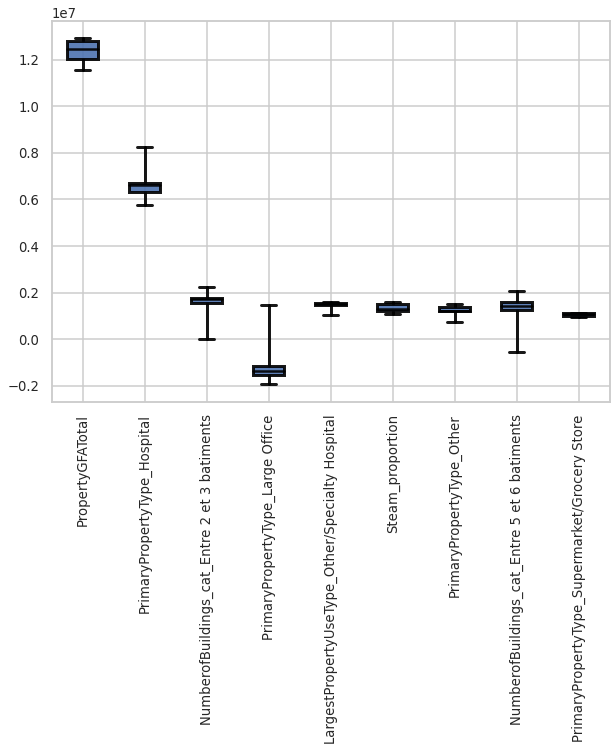

In [38]:
sns.set_context("talk",font_scale = 0.8)
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 7))
_ = coefs.plot.box(**boxplot_property, ax=ax)

### Avec log transformation de la cible et sélection de features

In [39]:
# Entrainement du modèle
model.fit(data_train, target_conso_log_train)

# Metrics sur les données d'entrainement
y_pred_conso_log_train = model.predict(data_train)

print("MAE : {:.2f}".format(metrics.mean_absolute_error(np.expm1(y_pred_conso_log_train), target_conso_train)))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(np.expm1(y_pred_conso_log_train), target_conso_train)))
print("R2 - test : {:.2f}".format(r2_score(target_conso_train, np.expm1(y_pred_conso_log_train))))

bilan_conso.append(['Linéaire_log' , 'Train','MAE', format(metrics.mean_absolute_error(np.expm1(y_pred_conso_log_train), target_conso_train))])
bilan_conso.append(['Linéaire_log' , 'Train','RMSE', format(metrics.mean_squared_error(np.expm1(y_pred_conso_log_train), target_conso_train))])
bilan_conso.append(['Linéaire_log' , 'Train', 'R2', r2_score(np.expm1(y_pred_conso_log_train), target_conso_train)])

MAE : 6085333.64
RMSE : 2359570032878953.50
R2 - test : -4.76


In [40]:
# Metrics sur les données de test  
y_pred_conso_log_test = model.predict(data_test)

print("MAE : {:.2f}".format(metrics.mean_absolute_error(np.expm1(y_pred_conso_log_test), target_conso_test)))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(np.expm1(y_pred_conso_log_test), target_conso_test)))
print("R2 - test : {:.2f}".format(r2_score(target_conso_test, np.expm1(y_pred_conso_log_test))))

bilan_conso.append(['Linéaire_log' , 'Test','MAE', format(metrics.mean_absolute_error(np.expm1(y_pred_conso_log_test), target_conso_test))])
bilan_conso.append(['Linéaire_log' , 'Test','RMSE', format(metrics.mean_squared_error(np.expm1(y_pred_conso_log_test), target_conso_test))])
bilan_conso.append(['Linéaire_log' , 'Test','R2', r2_score(np.expm1(y_pred_conso_log_test), target_conso_test)])

MAE : 7246823.28
RMSE : 1886632636626186.25
R2 - test : -11.26


## 5) Cas des émissions de CO2
### Sans log-transformation de la cible et sans sélection de feature

In [41]:
model = make_pipeline(StandardScaler(),LinearRegression())
cv_results = cross_validate(model, data_train, target_emmi_train,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,cv=5,return_estimator=True)
cv_results = pd.DataFrame(cv_results)
cv_results.loc['Mean']=cv_results.mean()
cv_results

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.009185,0.005026,"(StandardScaler(), LinearRegression())",-4.967144e+22,0.736113,-2.134899e+28,-96495.038609,-9.026888e+12,-144.103995
1,0.007562,0.004209,"(StandardScaler(), LinearRegression())",-2.706240e+18,0.651661,-1.650584e+24,-111832.292287,-7.937215e+10,-140.787681
2,0.007715,0.004342,"(StandardScaler(), LinearRegression())",-1.834384e+22,0.753071,-2.608127e+27,-108155.073315,-3.155110e+12,-137.441292
3,0.006594,0.003489,"(StandardScaler(), LinearRegression())",6.853314e-01,0.687173,-1.616200e+05,-108033.763953,-1.528848e+02,-148.481042
4,0.006478,0.003817,"(StandardScaler(), LinearRegression())",3.721537e-01,0.713742,-1.226585e+05,-121583.049346,-1.850869e+02,-156.129720
Mean,0.007507,0.004177,NaN,-1.360360e+22,0.708352,-4.791754e+27,-109219.843502,-2.452274e+12,-145.388746


In [42]:
# Entrainement du modèle
model.fit(data_train, target_emmi_train)

# Metrics sur les données d'entrainement
y_pred_emmi_train = model.predict(data_train)

print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, y_pred_emmi_train)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, y_pred_emmi_train)))
print('R2 - test :', r2_score(target_emmi_train,y_pred_emmi_train))

RMSE - test : 114888.62
MAE - test : 145.57
R2 - test : 0.6968722803620346


In [43]:
# Metrics sur les données de test  
y_pred_emmi_test = model.predict(data_test)

print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, y_pred_emmi_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, y_pred_emmi_test)))
print('R2 - test :', r2_score(target_emmi_test,y_pred_emmi_test))

RMSE - test : 84170.66
MAE - test : 152.52
R2 - test : 0.12684710313860237


In [44]:
# Ecriture des résultats
bilan_emmi.append(['Linéaire - baseline' , 'Train','MAE',format(metrics.mean_absolute_error(target_emmi_train, y_pred_emmi_train))])
bilan_emmi.append(['Linéaire - baseline' , 'Train','RMSE', format(metrics.mean_squared_error(target_emmi_train, y_pred_emmi_train))])
bilan_emmi.append(['Linéaire - baseline' , 'Train', 'R2', r2_score(target_emmi_train,y_pred_emmi_train)])

bilan_emmi.append(['Linéaire - baseline' , 'Test', 'MAE', format(metrics.mean_absolute_error(target_emmi_test, y_pred_emmi_test))])
bilan_emmi.append(['Linéaire - baseline' , 'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, y_pred_emmi_test))])
bilan_emmi.append(['Linéaire - baseline' , 'Test','R2', r2_score(target_emmi_test,y_pred_emmi_test)])

### Sans log-transformation de la cible et avec sélection de feature

In [45]:
model = make_pipeline(StandardScaler(),LinearRegression())
cv_results = cross_validate(model, data_train[features_a_conserver_emmi], target_emmi_train,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,cv=5,return_estimator=True)
cv_results = pd.DataFrame(cv_results)
cv_results.loc['Mean']=cv_results.mean()
cv_results

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.005237,0.004327,"(StandardScaler(), LinearRegression())",0.513829,0.704157,-208958.354334,-108180.511938,-176.723512,-135.622387
1,0.004797,0.004449,"(StandardScaler(), LinearRegression())",0.732292,0.622218,-163279.600377,-121284.813803,-132.324286,-137.894116
2,0.004843,0.004451,"(StandardScaler(), LinearRegression())",-0.413486,0.734783,-200969.506037,-116165.265681,-153.547369,-136.087130
3,0.004892,0.004463,"(StandardScaler(), LinearRegression())",0.690583,0.656151,-158922.533492,-118746.985791,-138.973347,-146.435359
4,0.005337,0.004485,"(StandardScaler(), LinearRegression())",0.511027,0.682638,-95527.670904,-134793.931458,-152.070127,-150.689302
Mean,0.005021,0.004435,NaN,0.406849,0.679989,-165531.533029,-119834.301734,-150.727728,-141.345659


In [46]:
# Entrainement du modèle
model.fit(data_train[features_a_conserver_emmi], target_emmi_train)

# Metrics sur les données d'entrainement
y_pred_emmi_select_train = model.predict(data_train[features_a_conserver_emmi])

print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, y_pred_emmi_select_train)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, y_pred_emmi_select_train)))
print('R2 - test :', r2_score(target_emmi_train,y_pred_emmi_select_train))


RMSE - test : 123922.02
MAE - test : 143.08
R2 - test : 0.6730381162707799


In [47]:
# Metrics sur les données de test
y_pred_emmi_select_test = model.predict(data_test[features_a_conserver_emmi])

print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, y_pred_emmi_select_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, y_pred_emmi_select_test)))
print('R2 - test :', r2_score(target_emmi_test,y_pred_emmi_select_test))


RMSE - test : 81693.66
MAE - test : 141.01
R2 - test : 0.15254253262087092


In [48]:
# Ecriture des résultats
bilan_emmi.append(['Linéaire - select' , 'Train','MAE', format(metrics.mean_absolute_error(target_emmi_train, y_pred_emmi_select_train))])
bilan_emmi.append(['Linéaire - select' , 'Train','RMSE', format(metrics.mean_squared_error(target_emmi_train, y_pred_emmi_select_train))])
bilan_emmi.append(['Linéaire - select' , 'Train', 'R2', r2_score(target_emmi_train,y_pred_emmi_select_train)])

bilan_emmi.append(['Linéaire - select' , 'Test', 'MAE', format(metrics.mean_absolute_error(target_emmi_test, y_pred_emmi_select_test))])
bilan_emmi.append(['Linéaire - select' , 'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, y_pred_emmi_select_test))])
bilan_emmi.append(['Linéaire - select' , 'Test','R2', r2_score(target_emmi_test,y_pred_emmi_select_test)])

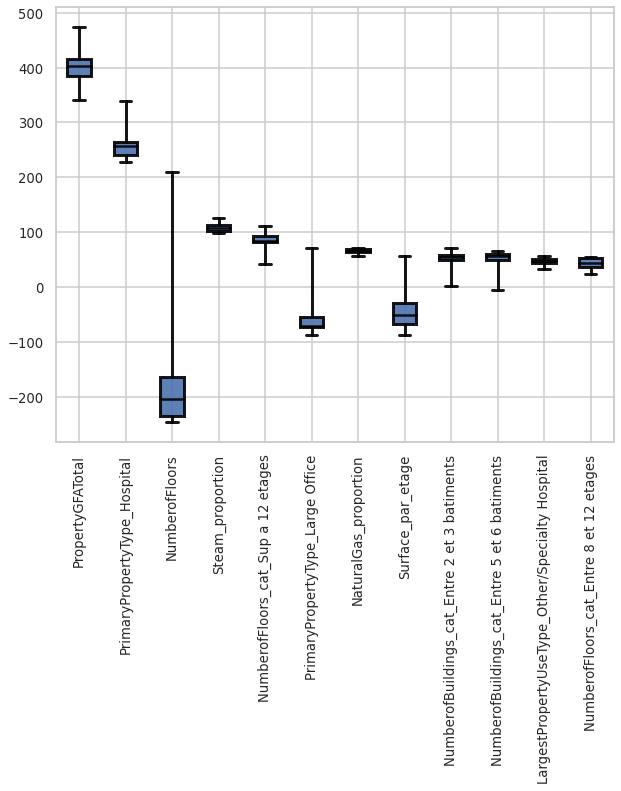

In [49]:

coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"].drop(['Mean'])]

coefs = np.reshape(coefs, (5, data_train[features_a_conserver_emmi].shape[1]))
coefs = pd.DataFrame(coefs, columns=data_train[features_a_conserver_emmi].columns)
coefs.loc['Abs - mean']=abs(coefs.mean())
coefs=coefs.sort_values(by='Abs - mean',axis=1,ascending=False)

sns.set_context("talk",font_scale = 0.8)
_, ax = plt.subplots(figsize=(10, 8))
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [50]:
# Test avec TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor
model2 = make_pipeline(StandardScaler(),TransformedTargetRegressor(regressor=linear_model.LinearRegression(),func=np.log1p,inverse_func=np.expm1))
cv_results = cross_validate(model2, data_train[features_a_conserver_emmi], target_emmi_train,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,cv=5,return_estimator=True)
cv_results = pd.DataFrame(cv_results)
cv_results.loc['Mean']=cv_results.mean()
cv_results

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.004433,0.003903,"(StandardScaler(), TransformedTargetRegressor(...",-4.364427e+06,-86.092290,-1.875850e+12,-3.184689e+07,-84798.451791,-300.501635
1,0.005012,0.004208,"(StandardScaler(), TransformedTargetRegressor(...",-8.197702e+02,-1512.745175,-5.006022e+08,-4.859795e+08,-1475.560957,-805.865842
2,0.005232,0.004233,"(StandardScaler(), TransformedTargetRegressor(...",1.855470e-01,-1246.076501,-1.157989e+05,-5.462210e+08,-101.957463,-988.261925
3,0.005415,0.004246,"(StandardScaler(), TransformedTargetRegressor(...",6.675266e-01,-978.423472,-1.707649e+05,-3.382402e+08,-92.410067,-847.730057
4,0.005123,0.004286,"(StandardScaler(), TransformedTargetRegressor(...",-1.544609e+01,-1508.891260,-3.212971e+06,-6.412988e+08,-239.970897,-989.752401
Mean,0.005043,0.004175,NaN,-8.730522e+05,-1066.445740,-3.752707e+11,-4.087173e+08,-17341.670235,-786.422372


### Avec log-transformation de la cible

In [51]:
# Entrainement du modèle
model.fit(data_train, target_emmi_log_train)

# Metrics sur les données d'entrainement
y_pred_emmi_log_train = model.predict(data_train)

print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, np.expm1(y_pred_emmi_log_train))))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, np.expm1(y_pred_emmi_log_train))))
print("R2 : {:.2f}".format(r2_score(target_emmi_train, np.expm1(y_pred_emmi_log_train))))

bilan_emmi.append(['Linéaire_log' , 'Train','MAE', format(metrics.mean_absolute_error(target_emmi_log_train,np.expm1(y_pred_emmi_log_train)))])
bilan_emmi.append(['Linéaire_log' , 'Train','RMSE', format(metrics.mean_squared_error(target_emmi_log_train,np.expm1(y_pred_emmi_log_train)))])
bilan_emmi.append(['Linéaire_log' , 'Train', 'R2', r2_score(target_emmi_log_train, np.expm1(y_pred_emmi_log_train))])

MAE : 155.60
RMSE : 3983131.43
R2 : -9.51


In [52]:
# Metrics sur les données de test
y_pred_emmi_log_test = model.predict(data_test)

print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, np.expm1(y_pred_emmi_log_test))))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, np.expm1(y_pred_emmi_log_test))))
print("R2 : {:.2f}".format(r2_score(target_emmi_test, np.expm1(y_pred_emmi_log_test))))

bilan_emmi.append(['Linéaire_log' , 'Test', 'MAE', format(metrics.mean_absolute_error(target_emmi_test,np.expm1(y_pred_emmi_log_test)))])
bilan_emmi.append(['Linéaire_log' , 'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test,np.expm1(y_pred_emmi_log_test)))])
bilan_emmi.append(['Linéaire_log' , 'Test','R2', r2_score(target_emmi_test, np.expm1(y_pred_emmi_log_test))])

MAE : 130.69
RMSE : 444012.88
R2 : -3.61


### Tests de différents encodage (sur les émissions de CO2 - sans encodage de la cible)

In [53]:
### Sur les variables numériques

Liste_encoder = [preprocessing.StandardScaler(),preprocessing.RobustScaler(unit_variance=True),preprocessing.QuantileTransformer(n_quantiles=50, random_state=0),preprocessing.MinMaxScaler()]
moyenne_MAE = []

for encoder in Liste_encoder:
    model = make_pipeline(encoder,LinearRegression())
    cv_results = cross_validate(model, data_train, target_emmi_train,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,cv=5,return_estimator=True)
    moyenne_MAE.append([encoder,cv_results['train_neg_mean_absolute_error'].mean()])
    
moyenne_MAE

[[StandardScaler(), -145.38874591670128],
 [RobustScaler(unit_variance=True), -145.57701085218892],
 [QuantileTransformer(n_quantiles=50, random_state=0), -164.66873707876846],
 [MinMaxScaler(), -145.67326336291197]]

Très peu d'influence des différents encodages numériques

## 6) Bilan

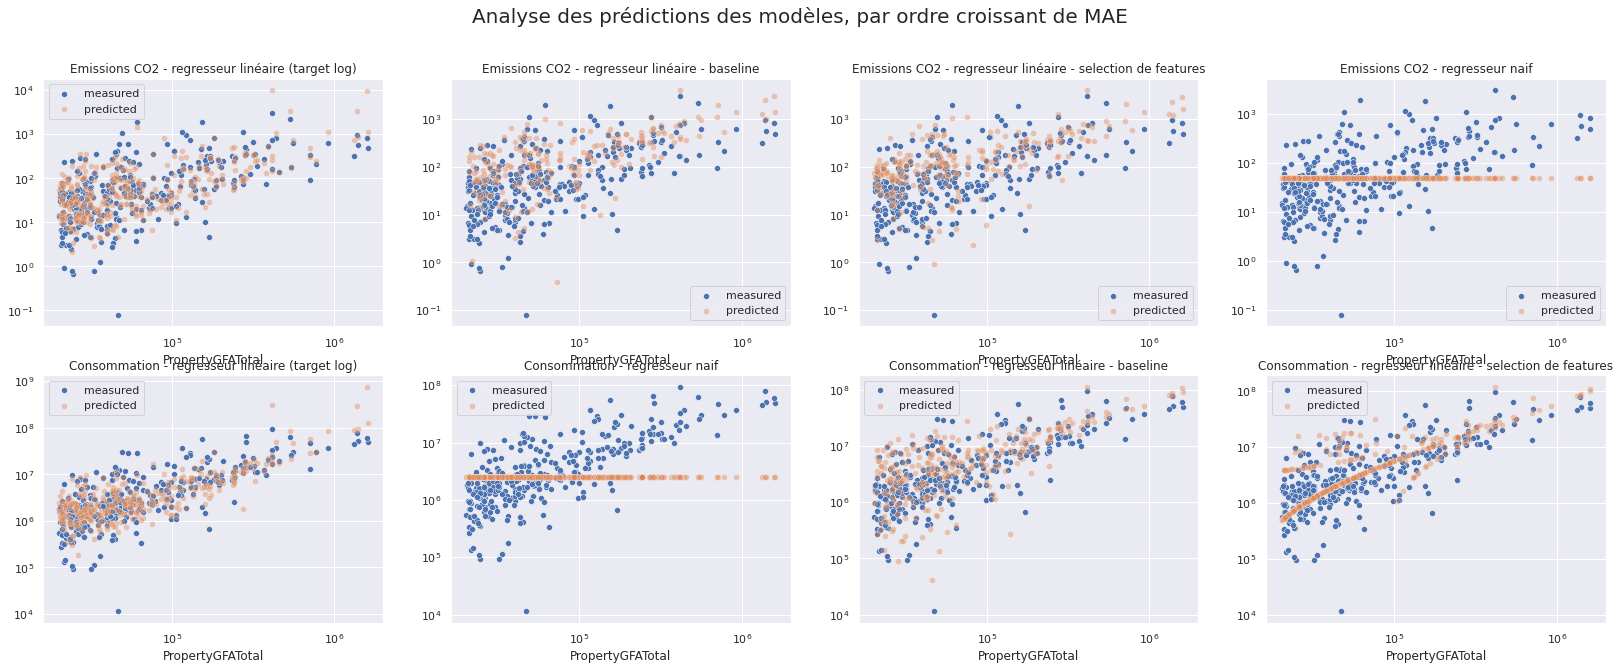

In [54]:
sns.set()
fig, axes = plt.subplots(2,4)
plt.rcParams["figure.figsize"] = (25,22)

# Plot regresseur Naif
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,3])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=y_pred_dummy_emmi_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,3])

# Plot regresseur Linéaire
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,1])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=y_pred_emmi_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,1])

# Plot regresseur Linéaire - sélection de features
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,2])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=y_pred_emmi_select_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,2])

# Plot regresseur Linéaire - log
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=np.expm1(y_pred_emmi_log_test).ravel(), label='predicted', alpha=0.4,ax = axes[0,0])

# Plot regresseur Naif
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,1])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=y_pred_dummy_conso_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,1])

# Plot regresseur Linéaire
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,2])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=y_conso_lin_base_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,2])

# Plot regresseur Linéaire - sélection de features
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,3])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=y_conso_lin_select_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,3])

# Plot regresseur Linéaire - log
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=np.expm1(y_pred_conso_log_test).ravel(), label='predicted', alpha=0.4,ax = axes[1,0])

# Mise en place des titres et de l'échelle des axes
axes[0,3].set_title('Emissions CO2 - regresseur naif')
axes[0,1].set_title('Emissions CO2 - regresseur linéaire - baseline')
axes[0,2].set_title('Emissions CO2 - regresseur linéaire - selection de features')
axes[0,0].set_title('Emissions CO2 - regresseur linéaire (target log)')

axes[1,1].set_title('Consommation - regresseur naif')
axes[1,2].set_title('Consommation - regresseur linéaire - baseline')
axes[1,3].set_title('Consommation - regresseur linéaire - selection de features')
axes[1,0].set_title('Consommation - regresseur linéaire (target log)')

plt.suptitle('Analyse des prédictions des modèles, par ordre croissant de MAE',fontsize=20)

for i in range(2):
    for j in range(4):
        axes[i,j].set_yscale('log')
        axes[i,j].set_xscale('log')

# _=axes[0,3].set(ylim=(-500,17550))
# _=axes[1,3].set(ylim=(-500,500000000))

In [55]:
# Affichage des scores - Consommation
bilan_conso =pd.DataFrame(bilan_conso)
bilan_conso[3]=pd.to_numeric(bilan_conso[3])
# bilan_conso[3] = bilan_conso[3].apply('{0:.2f}'.format)
bilan_conso.pivot(index=0,columns=[2,1]).sort_values([(3,  'MAE',  'Test')],ascending=True)

3                                        \
2                             MAE          RMSE        R2           MAE   
1                           Train         Train     Train          Test   
0                                                                         
Linéaire - select    4.223934e+06  1.475465e+14  0.639764  3.973199e+06   
Linéaire - baseline  4.668046e+06  1.352724e+14  0.669731  4.884987e+06   
Naif                 6.561264e+06  3.756987e+14 -0.082975  6.064434e+06   
Linéaire_log         6.085334e+06  2.359570e+15  0.302296  7.246823e+06   

                                             
2                            RMSE        R2  
1                            Test      Test  
0                                            
Linéaire - select    6.937763e+13  0.549217  
Linéaire - baseline  7.011946e+13  0.544397  
Naif                 4.283433e+14 -0.058828  
Linéaire_log         1.886633e+15  0.229777

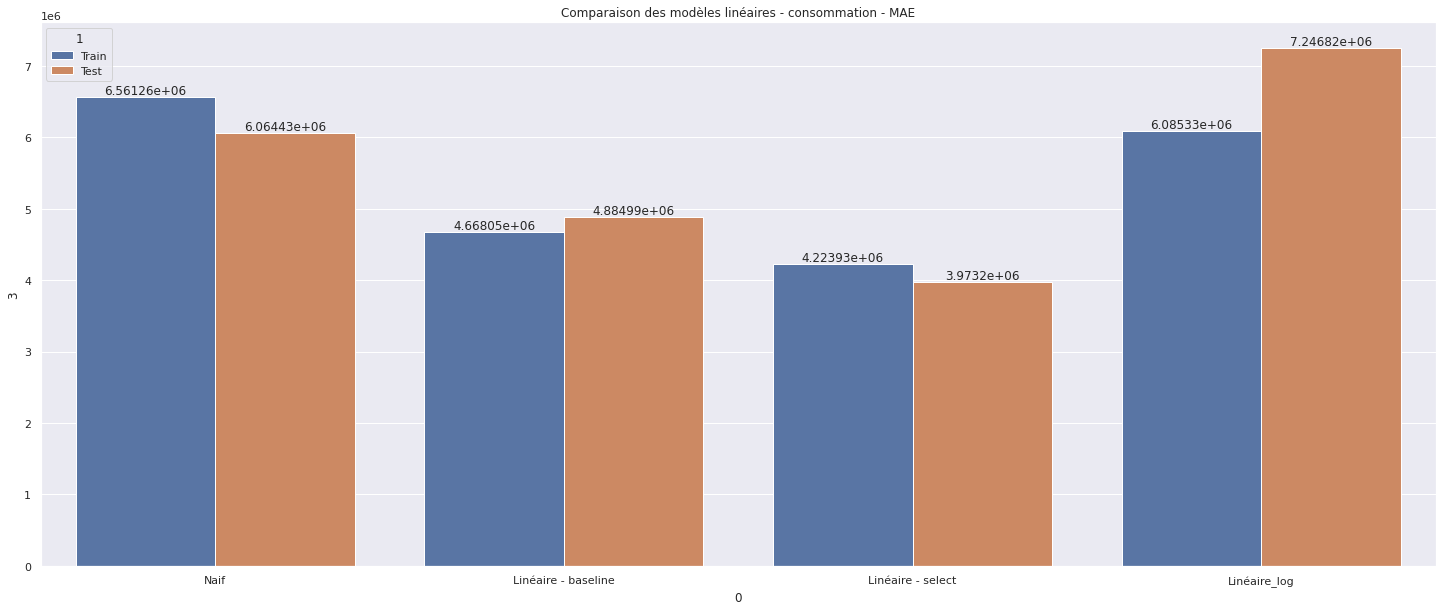

In [56]:
# Affichage des MAE - conso
bilan_conso_MAE = bilan_conso[bilan_conso[2]=='MAE']

sns.set()
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.barplot(x=bilan_conso_MAE[0],y=abs(bilan_conso_MAE[3]),hue=bilan_conso_MAE[1],data=bilan_conso_MAE)
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Comparaison des modèles linéaires - consommation - MAE')

In [57]:
# Affichage des scores - Emmissions
bilan_emmi =pd.DataFrame(bilan_emmi)
bilan_emmi[3]=pd.to_numeric(bilan_emmi[3])
# bilan_emmi[3] = bilan_emmi[3].apply('{0:.2f}'.format)
bilan_emmi.pivot(index=0,columns=[2,1]).sort_values([(3,  'MAE',  'Test')],ascending=True)

3                                          \
2                           MAE          RMSE            R2         MAE   
1                         Train         Train         Train        Test   
0                                                                         
Linéaire_log         215.213473  5.666349e+06 -2.727040e+06  130.693245   
Linéaire - select    143.080825  1.239220e+05  6.730381e-01  141.011129   
Naif                 149.977890  3.076880e+05 -5.139258e-02  141.914862   
Linéaire - baseline  145.569196  1.148886e+05  6.968723e-01  152.520328   

                                              
2                             RMSE        R2  
1                             Test      Test  
0                                             
Linéaire_log         444012.882913 -3.606013  
Linéaire - select     81693.660769  0.152543  
Naif                 454966.004977 -0.029148  
Linéaire - baseline   84170.662601  0.126847

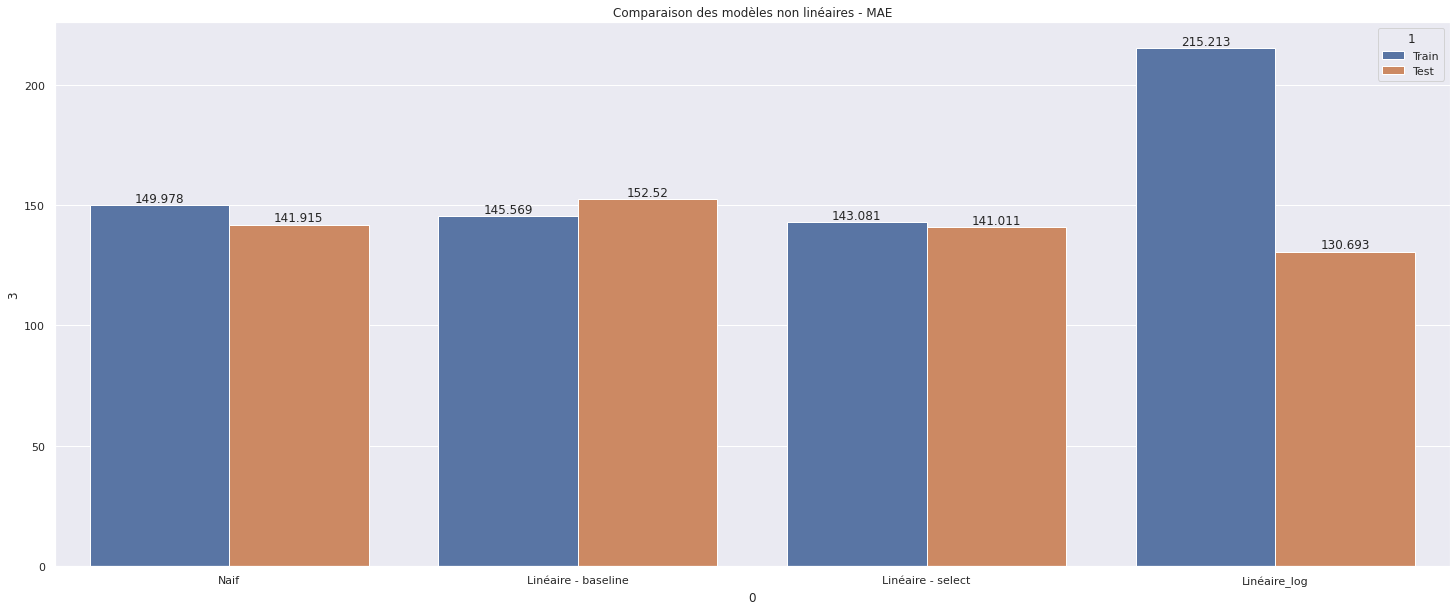

In [58]:
# Affichage des MAE - émissions
bilan_emmi_MAE = bilan_emmi[bilan_emmi[2]=='MAE']

sns.set()
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.barplot(x=bilan_emmi_MAE[0],y=abs(bilan_emmi_MAE[3]),hue=bilan_emmi_MAE[1],data=bilan_emmi_MAE)
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Comparaison des modèles non linéaires - MAE')

In [59]:
# Création des données pour export
preditions_bilan_names = ['y_pred_dummy_emmi','y_pred_dummy_conso','y_pred_emmi_lin','y_pred_conso_lin','y_pred_emmi_select_lin','y_pred_conso_select_lin','y_pred_emmi_log_lin','y_pred_conso_log_lin']
predictions_bilan = pd.DataFrame(np.hstack((y_pred_dummy_emmi_test.reshape(-1,1),y_pred_dummy_conso_test.reshape(-1,1),y_pred_emmi_test,y_conso_lin_base_test.reshape(-1,1),y_pred_emmi_select_test,y_conso_lin_select_test,y_pred_emmi_log_test,y_pred_conso_log_test)),columns=preditions_bilan_names)

target_train_names=['target_conso_train','target_emmi_train','target_conso_log_train','target_emmi_log_train']
target_test_names=['target_conso_test','target_emmi_test','target_conso_log_test','target_emmi_log_test']
df_target_train = pd.DataFrame(pd.concat([target_conso_train,target_emmi_train,target_conso_log_train,target_emmi_log_train],axis=1))
df_target_test = pd.DataFrame(pd.concat([target_conso_test,target_emmi_test,target_conso_log_test,target_emmi_log_test],axis=1))
df_target_train.columns = target_train_names
df_target_test.columns = target_test_names

In [60]:
# Exportation des données
predictions_bilan.to_csv('predictions_bilan.csv',index=False)
bilan_conso.to_csv("bilan_conso.csv",index=False)
bilan_emmi.to_csv("bilan_emmi.csv",index=False)
data_train.to_csv("data_train.csv",index=False)
data_test.to_csv("data_test.csv",index=False)
df_target_train.to_csv("df_target_train.csv",index=False)
df_target_test.to_csv("df_target_test.csv",index=False)
data_encoded_2016.to_csv("data_encoded_2016.csv",index=False)
data_encoded_futur.to_csv("data_encoded_futur.csv",index=False)
energystar_score_2015_train.to_csv("energystar_score_2015_train.csv",index=False)
energystar_score_2015_test.to_csv("energystar_score_2015_test.csv",index=False)
BuidingType_2016.to_csv("BuidingType_2016.csv",index=False)

In [61]:
Fin

NameError: name 'Fin' is not defined

In [ ]:
## Exemple d'un gridsearchCV

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"fit_intercept": [True, False],
             "normalize": [True, False]}

mlr_grid_cv = GridSearchCV(LinearRegression(),
                            param_grid=param_mlr,
                            cv=10,
                            scoring=('r2','neg_mean_absolute_error','neg_mean_squared_error'),
                            return_train_score = True,
                            refit='r2',
                            n_jobs = -1)

In [ ]:
linear_model = mlr_grid_cv.fit(data_encoded_conso.drop(['TotalGHGEmissions','SiteEnergyUse'],axis=1), target_conso)
# 

In [ ]:
def model_scores(model):
    '''
    Fonction permettant d'inscrire les résultats dans un DataFrame
    ---
    Paramètre:
    - model : correspond au modèle fitté
    ---
    Return:
    - Dataframe avec l'ensemble des résultats
    - Affiche en print les best_param, best_rseult et les meilleurs scores
    '''
    df_results = pd.DataFrame(model.cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    best_mae = model.best_score_
    best_params = model.best_params_
    best_rmse = np.mean(df_results[df_results.rank_test_neg_mean_squared_error == 1]['mean_test_neg_mean_squared_error'])
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    training_time = round((np.mean(df_results.mean_fit_time)*data_encoded_conso.drop(['TotalGHGEmissions','SiteEnergyUse'],axis=1).shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score RMSE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_mae,3), round(best_rmse,3), round(best_r2,3),best_params, training_time))
    return df_results